In [42]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Dependencies for additional queries
%matplotlib inline
from matplotlib import style
style.use('bmh')
import matplotlib.pyplot as plt

In [8]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [10]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) ==6).all()

In [16]:
#  3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) ==6).all()

In [14]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns =['date', 'temperature'])
june_temp_df.set_index(june_temp_df['date'], inplace=True)

In [15]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [17]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) ==12).all()

In [18]:
# 7. Convert the December temperatures to a list.
dec_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date) ==12).all()

In [19]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp, columns =['date', 'temperature'])
dec_temp_df.set_index(dec_temp_df['date'], inplace=True)

In [20]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [24]:
# Query that filters the Measurement table to retrieve the precipitation for the month of December and June.
precip_dec = session.query(Measurement.date, Measurement.prcp).\
        filter(extract('month', Measurement.date) ==12).all()

In [25]:
# DataFrame from the list of precipitation for the month of December and June. 
dec_precip_df = pd.DataFrame(precip_dec, columns =['date', 'precipitation'])
dec_precip_df.set_index(dec_precip_df['date'], inplace=True)

In [26]:
precip_June = session.query(Measurement.date, Measurement.prcp).\
        filter(extract('month', Measurement.date) ==6).all()

In [28]:
june_precip_df = pd.DataFrame(precip_June, columns =['date', 'precipitation'])
june_precip_df.set_index(june_precip_df['date'], inplace=True)

In [23]:
dec_precip_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


In [29]:
june_precip_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [31]:
june_prc_temps = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) ==6).all()
june_prc_temps=list((june_prc_temps))

june_prc_temps_df = pd.DataFrame(june_prc_temps,columns=['date','June Precipitation','June Temperatures'])
june_prc_temps_df.set_index(june_prc_temps_df['date'],inplace=True)
june_prc_temps_df.describe()

,June Precipitation,June Temperatures
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [33]:
dec_prc_temps = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) ==12).all()
dec_prc_temps=list((dec_prc_temps))

dec_prc_temps_df = pd.DataFrame(dec_prc_temps,columns=['date','December Precipitation','December Temperatures'])
dec_prc_temps_df.set_index(dec_prc_temps_df['date'],inplace=True)
dec_prc_temps_df.describe()

,December Precipitation,December Temperatures
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


In [38]:
decgraph_temp = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date) ==12).all()

In [39]:
decgraph_temp

[(76.0,),
 (74.0,),
 (74.0,),
 (64.0,),
 (64.0,),
 (67.0,),
 (77.0,),
 (66.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (74.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (75.0,),
 (75.0,),
 (72.0,),
 (69.0,),
 (68.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (71.0,),
 (73.0,),
 (73.0,),
 (77.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (70.0,),
 (73.0,),
 (69.0,),
 (74.0,),
 (72.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (70.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (73.0,),
 (73.0,),
 (72.0,),
 (63.0,),
 (65.0,),
 (71.0,),
 (76.0,),
 (70.0,),
 (76.0,),
 (69.0,),
 (69.0,),
 (69.0,),
 (74.0,),
 (76.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (73.0,),
 (73.0,),
 (73.0,),
 (74.0,),
 (74.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (64.0,),
 (66.0,),
 (73.0,),
 (72.0,),
 (65.0,),
 (64.0,),
 (69.0,),
 (68.0,),
 (77.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (69.0,),
 (70.0,),
 (72.0,),
 (76.0,),
 (75.0,),
 (69.0,),
 (71.0,),
 (71.0,),


In [40]:
decgraph_temp_df = pd.DataFrame(decgraph_temp)
print(decgraph_temp_df)

         0
0     76.0
1     74.0
2     74.0
3     64.0
4     64.0
...    ...
1512  71.0
1513  71.0
1514  69.0
1515  65.0
1516  65.0

[1517 rows x 1 columns]


(0.0, 400.0)

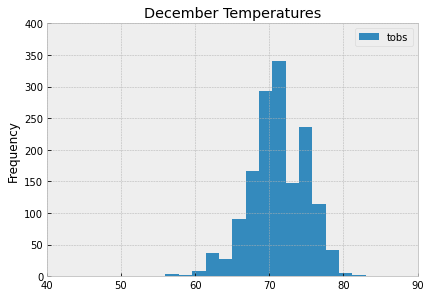

In [43]:
decgraph_temp_df = pd.DataFrame(decgraph_temp, columns=['tobs'])
decgraph_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlim([40,90])
plt.ylim([0,400])

In [44]:
Junegraph_temp = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date) ==6).all()

In [45]:
Junegraph_temp_df = pd.DataFrame(Junegraph_temp)

(0.0, 400.0)

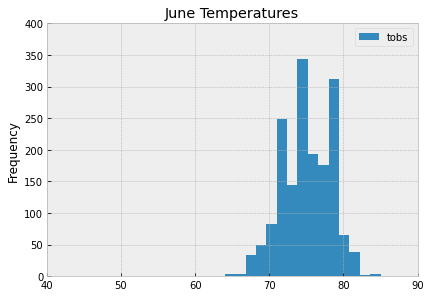

In [46]:
Junegraph_temp_df = pd.DataFrame(Junegraph_temp, columns=['tobs'])
Junegraph_temp_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')
plt.xlim([40,90])
plt.ylim([0,400])